In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets.embed import embed_minimal_html
import ipywidgets as widgets
import os
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; #fixr
from mpl_toolkits.basemap import Basemap
import scipy.linalg

In [2]:
#Special Color Maker
import matplotlib.colors as colors
colors1 = plt.cm.winter(np.linspace(0, 1, 500))
colors2 = plt.cm.hot_r(np.linspace(0, 0.9, 500))

# combine them and build a new colormap
color = np.vstack((colors1, colors2))
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', color)

In [3]:
os.chdir('data/')

In [10]:
file = 'data/air.mon.meanv3.nc'
AirData = nc.Dataset(file)

In [17]:
air_lats = AirData.variables['lat'][:]
air_lons = AirData.variables['lon'][:]
air = AirData.variables['air'][(1980-1836)*12+11::12]
levels = AirData.variables['level'][:]

In [14]:
file = 'data/pottmp.1998.nc' #any year would work
data = nc.Dataset(file)

water_lats = data.variables['lat'][:]
water_lons = data.variables['lon'][:]

In [15]:
PhysicalEOFs = np.load('January Physical EOFs.npy')

In [18]:
xxair, yyair = np.meshgrid(air_lons, air_lats)
xxwater, yywater = np.meshgrid(water_lons, water_lats)

In [19]:
airsize= air[0].size
air_phys = PhysicalEOFs[0:airsize,:]
air_phys = np.reshape(air_phys, (28,181,360,36))

# Figure 3

In [24]:
pcs = np.load('January PCs.npy') #loading in pc data
time = np.arange(1980,2016) #creating time x axis

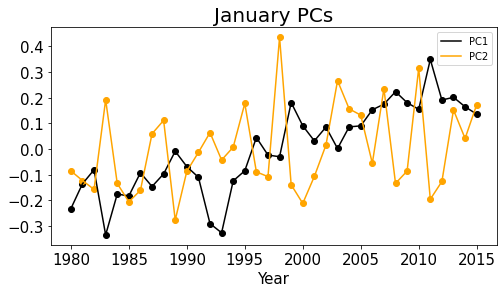

In [37]:
fig = plt.figure(figsize = (8,4))
plt.plot(time, pcs[:,0], 'k', label = 'PC1') #PC1
plt.scatter(time, pcs[:,0], color = 'k')
plt.plot(time, pcs[:,1], 'orange', label = 'PC2') #PC2
plt.scatter(time, pcs[:,1], color ='orange')
plt.title('January PCs', size =20)
plt.xlabel('Year', size =15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.legend()
#plt.savefig('January Air Only PCs.png')

# Figure 4

In [38]:
eigvals = np.load('January Eigenvalues.npy')

In [40]:
num_eval = np.arange(eigvals.shape[0])+1
cumulative_eval = np.cumsum(eigvals).real

Text(0.5, 1.0, 'January Air and Ocean Scree Plot')

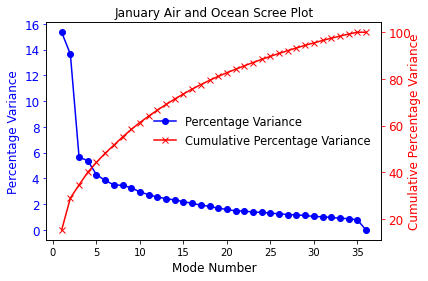

In [41]:
fig, ax = plt.subplots()

p1, = plt.plot(num_eval,(eigvals/cumulative_eval[-1])*100, 'b', marker = 'o',label = 'Percentage Variance')
plt.yticks(size = 12)
ax.set_ylabel("Percentage Variance", size = 12)
ax.yaxis.label.set_color('blue')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
p2, = plt.plot(num_eval,(cumulative_eval/cumulative_eval[-1])*100,'r', marker = 'x',label = 'Cumulative Percentage Variance')
plt.yticks(size = 12)
ax2.tick_params('y', colors='r')
ax2.set_ylabel("Cumulative Percentage Variance", size = 12)
ax2.yaxis.set_label_coords(1.08,0.5)
ax2.yaxis.label.set_color('red')

plt.legend(handles=[p1,p2],loc='center right', prop = {'size':11.4}, frameon=False)
plt.xticks(size =20)
ax.set_xlabel('Mode Number', size = 12)
plt.title('January Air and Ocean Scree Plot', size = 12)
#plt.savefig('January Air and Ocean Scree Plot.png')

# Figure 5

In [43]:
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return a

Text(0.5, 0.98, 'Jan Air-Ocean EOF1 at Different Layers')

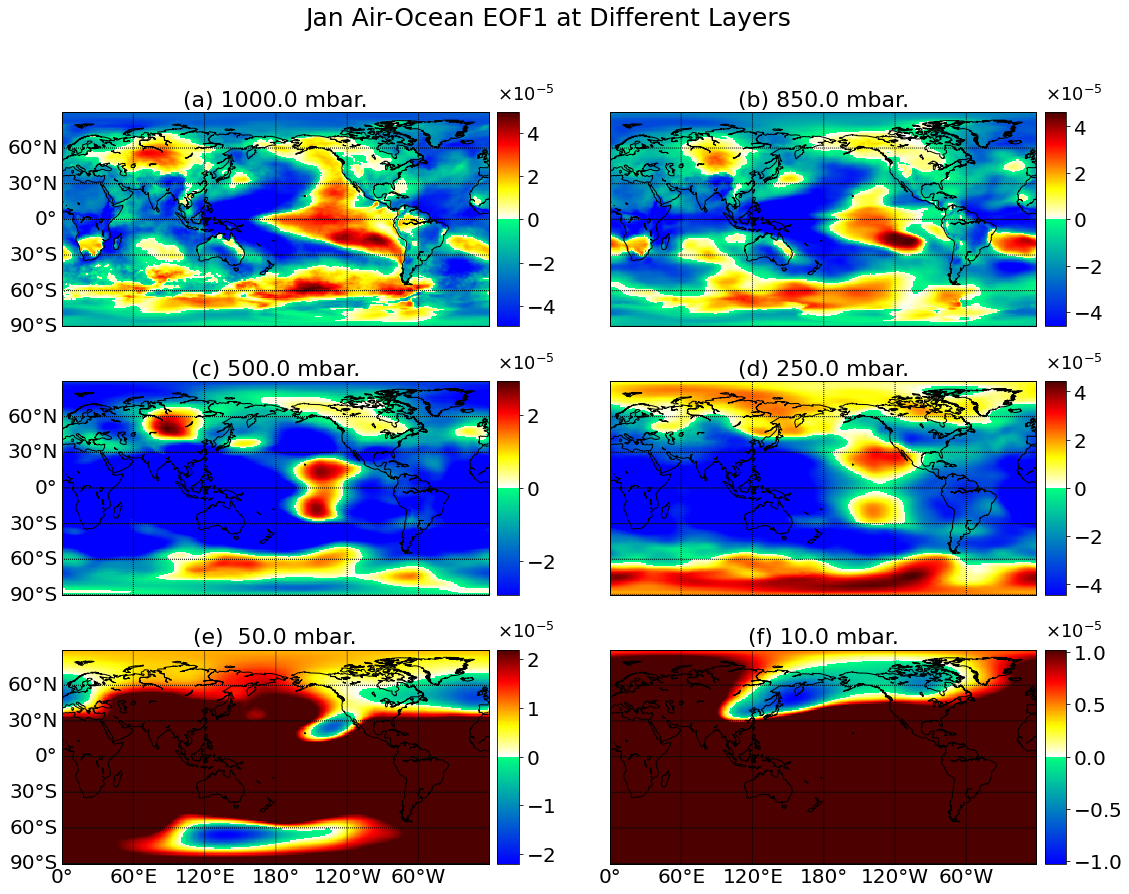

In [57]:
fig = plt.figure(figsize=(18,14))

#1000 mbar
ax1 = fig.add_subplot(3,2,1)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[0:181*360,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))

cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(a) "+ str(levels[0]) + ' mbar.', size = 22 )

#850 mbar
ax2 = fig.add_subplot(3,2,2)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*5:181*360*6,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12

cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(b) "+ str(levels[5]) + ' mbar.', size = 22 )

#500 mbar
ax3 = fig.add_subplot(3,2,3)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*12:181*360*13,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12

cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(c) "+ str(levels[12]) + ' mbar.', size = 22 )

#250 mbar
ax4 = fig.add_subplot(3,2,4)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*17:181*360*18,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')

cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(d) "+ str(levels[17]) + ' mbar.', size = 22 )
#50 mbar
ax5 = fig.add_subplot(3,2,5)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*22:181*360*23,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1], size = 20)
plt.title("(e)  "+ str(levels[22]) + ' mbar.', size = 22 )

#10mbar
ax6 = fig.add_subplot(3,2,6)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*25:181*360*26,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1], size = 20)
plt.title("(f) "+ str(levels[-3]) + ' mbar.', size = 22 )
plt.suptitle('Jan Air-Ocean EOF1 at Different Layers', size = 25)
#plt.savefig('Jan Air-Ocean EOF1 at Different Layers.png')

# Figure 6

In [50]:
cross_sec = np.nanmean(air_phys[:,60:100,:,0], axis = 1)

cross_sec1 = np.nanmean(air_phys[:,:,180:231,0], axis = 2)

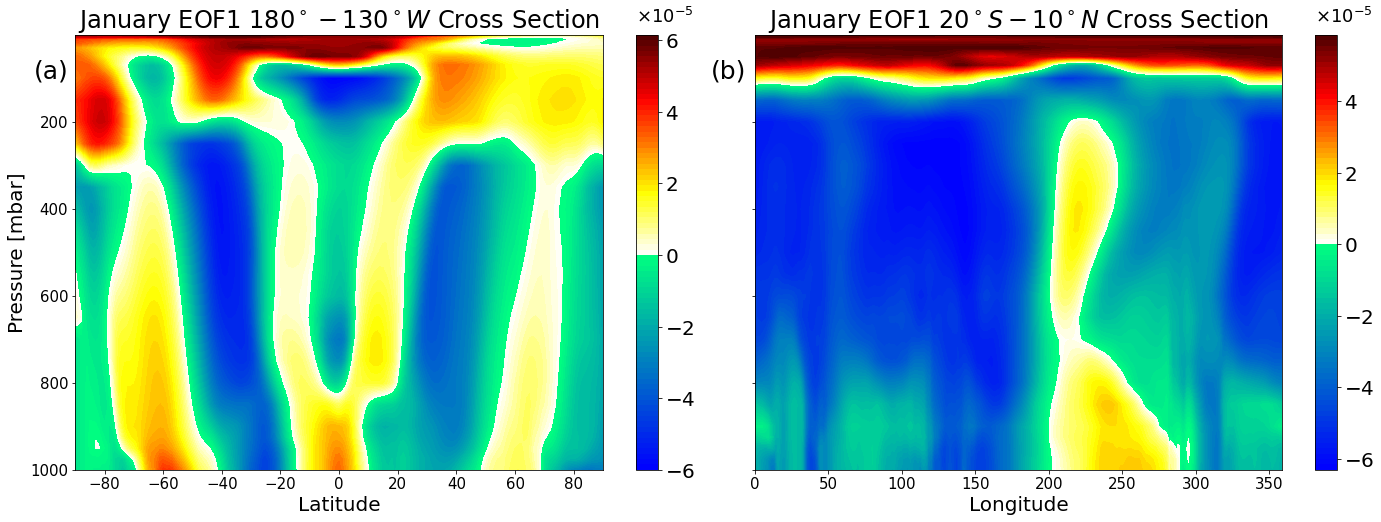

In [52]:
fig  = plt.figure(figsize = (24,8))
gs = fig.add_gridspec(1,2,wspace = 0.03)
axs = gs.subplots(sharey = True)
# HADLEY CELL CROSS SECTION
Z= 0-cross_sec1
norm = colors.TwoSlopeNorm(vcenter=0.0)
map1 = axs[0].contourf(yz, zy, Z,levels = 100,norm = norm, cmap = mymap )
axs[0].set_title(r'January EOF1 $180^\circ - 130^\circ W $ Cross Section', size = 24)
plt.text(-490, 100, '(a)', size = 25)
axs[0].invert_yaxis()

plt.sca(axs[0])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Pressure [mbar]', size = 20)
plt.xlabel('Latitude', size= 20)
cb1 = fig.colorbar(map1,ax=axs[0], format=ticker.ScalarFormatter(useMathText=True))
cb1.locator = ticker.MaxNLocator(nbins =8)
cb1.update_ticks()
#cb1.ax.set_title(r'$\times 10^{-5}$', size = 20)
cb1.ax.yaxis.get_offset_text().set_fontsize(18)
cb1.ax.yaxis.OFFSETTEXTPAD = 12
cb1.ax.yaxis.set_offset_position('left')
cb1.ax.tick_params(labelsize=20)

# ENSO CROSS SECTION
Z= 0-cross_sec
norm = colors.TwoSlopeNorm(vcenter=0.0)
map2 = axs[1].contourf(xz, zx, Z,levels = 100,norm = norm, cmap = mymap )
axs[1].set_title(r'January EOF1 $20^\circ S - 10^\circ N$ Cross Section', size = 24)
plt.sca(axs[1])
plt.text(-30,100, '(b)', size = 25, color = 'k')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Longitude', size= 20)
cb2 = fig.colorbar(map2,ax=axs[1], format =ticker.ScalarFormatter(useMathText=True))
cb2.locator = ticker.MaxNLocator(nbins =8)
#cb2.ax.set_title(r'$\times 10^{-5}$', size = 20)
cb2.update_ticks()
cb2.ax.yaxis.get_offset_text().set_fontsize(18)
cb2.ax.yaxis.OFFSETTEXTPAD = 12
cb2.ax.yaxis.set_offset_position('left')
cb2.ax.tick_params(labelsize=20)
#plt.savefig('Air-Ocean Vertical Cross Sections Mode 1')

# Figure 8

Text(0.5, 0.98, 'Jan Air-Ocean EOF2 at Different Layers')

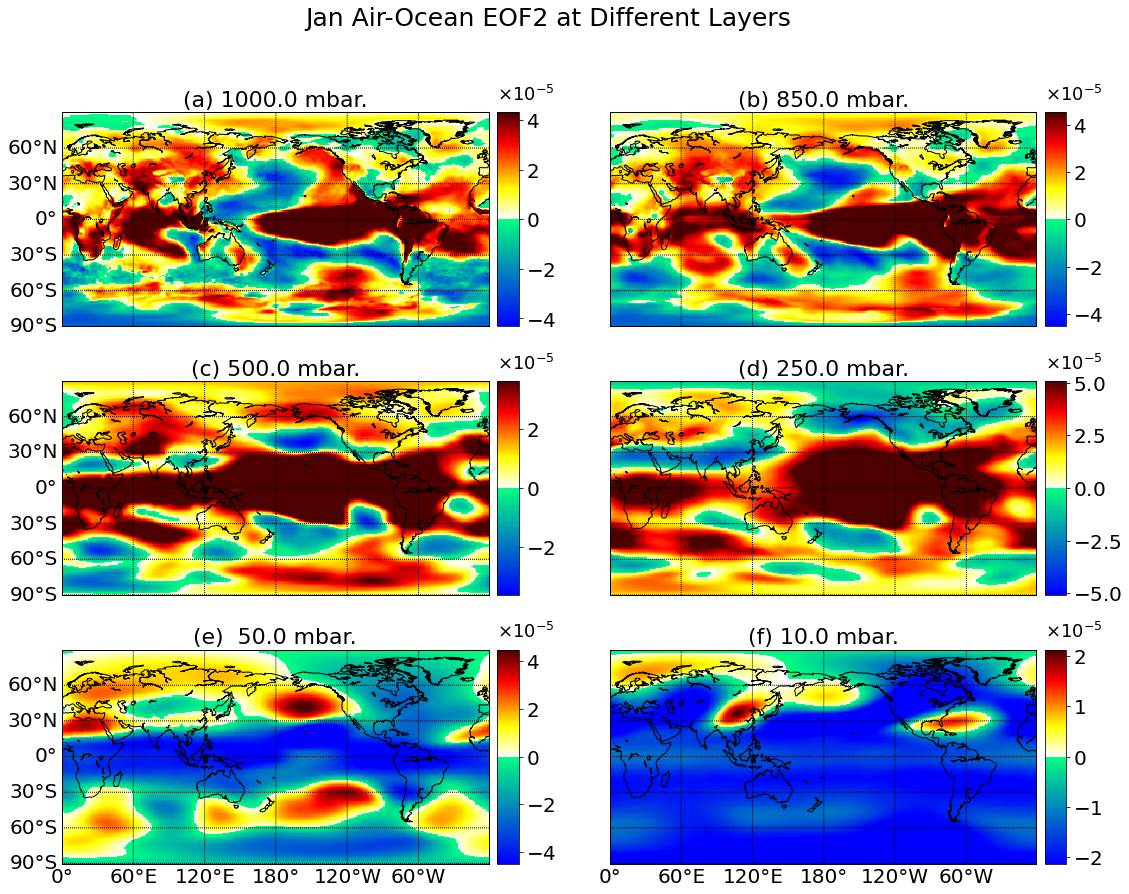

In [61]:
fig = plt.figure(figsize=(18,14))

#1000 mbar
ax1 = fig.add_subplot(3,2,1)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[0:181*360,1],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))

cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(a) "+ str(levels[0]) + ' mbar.', size = 22 )

#850 mbar
ax2 = fig.add_subplot(3,2,2)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*5:181*360*6,1],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12

cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(b) "+ str(levels[5]) + ' mbar.', size = 22 )

#500 mbar
ax3 = fig.add_subplot(3,2,3)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*12:181*360*13,1],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12

cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(c) "+ str(levels[12]) + ' mbar.', size = 22 )

#250 mbar
ax4 = fig.add_subplot(3,2,4)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*17:181*360*18,1],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(d) "+ str(levels[17]) + ' mbar.', size = 22 )
#50 mbar
ax5 = fig.add_subplot(3,2,5)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*22:181*360*23,1],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1], size = 20)
plt.title("(e)  "+ str(levels[22]) + ' mbar.', size = 22 )

#10mbar
ax6 = fig.add_subplot(3,2,6)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*25:181*360*26,1],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1], size = 20)
plt.title("(f) "+ str(levels[-3]) + ' mbar.', size = 22 )
plt.suptitle('Jan Air-Ocean EOF2 at Different Layers', size = 25)
#plt.savefig('Jan Air-Ocean EOF2 at Different Layers.png')

# Figure 9

In [62]:
cross_sec = np.nanmean(air_phys[:,60:100,:,1], axis = 1)

cross_sec1 = np.nanmean(air_phys[:,:,180:231,1], axis = 2)

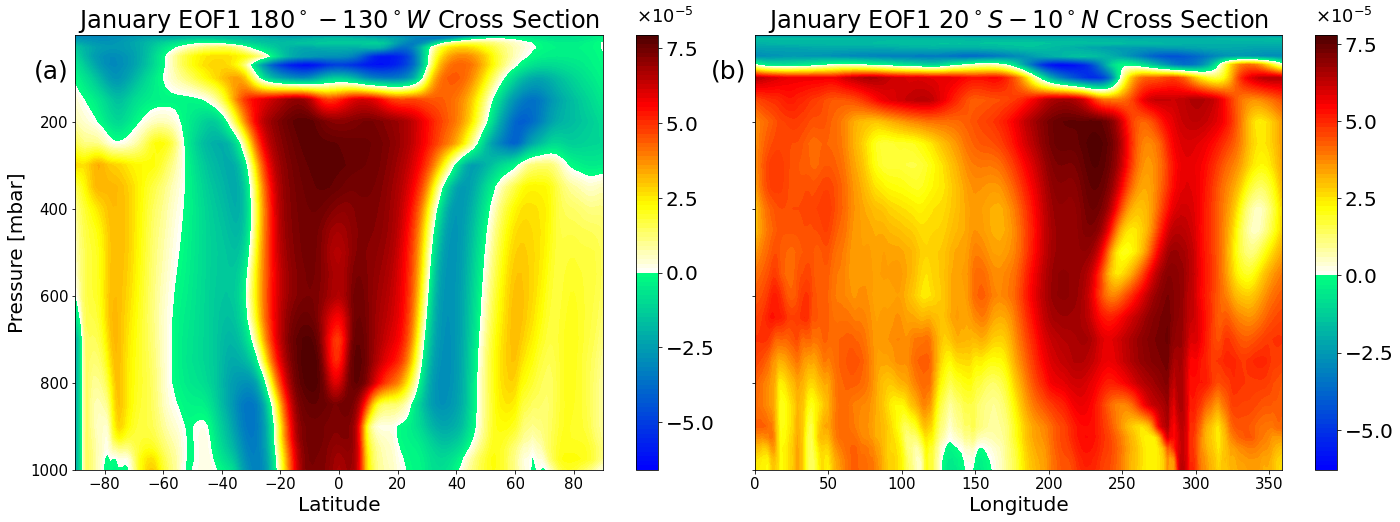

In [67]:
fig  = plt.figure(figsize = (24,8))
gs = fig.add_gridspec(1,2,wspace = 0.03)
axs = gs.subplots(sharey = True)
# HADLEY CELL CROSS SECTION
Z= cross_sec1
norm = colors.TwoSlopeNorm(vcenter=0.0)
map1 = axs[0].contourf(yz, zy, Z,levels = 100,norm = norm, cmap = mymap )
axs[0].set_title(r'January EOF1 $180^\circ - 130^\circ W $ Cross Section', size = 24)
plt.text(-490, 100, '(a)', size = 25)
axs[0].invert_yaxis()

plt.sca(axs[0])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Pressure [mbar]', size = 20)
plt.xlabel('Latitude', size= 20)
cb1 = fig.colorbar(map1,ax=axs[0], format=ticker.ScalarFormatter(useMathText=True))
cb1.locator = ticker.MaxNLocator(nbins =6)
cb1.update_ticks()
#cb1.ax.set_title(r'$\times 10^{-5}$', size = 20)
cb1.ax.yaxis.get_offset_text().set_fontsize(18)
cb1.ax.yaxis.OFFSETTEXTPAD = 12
cb1.ax.yaxis.set_offset_position('left')
cb1.ax.tick_params(labelsize=20)

# ENSO CROSS SECTION
Z= cross_sec
norm = colors.TwoSlopeNorm(vcenter=0.0)
map2 = axs[1].contourf(xz, zx, Z,levels = 100,norm = norm, cmap = mymap )
axs[1].set_title(r'January EOF1 $20^\circ S - 10^\circ N$ Cross Section', size = 24)
plt.sca(axs[1])
plt.text(-30,100, '(b)', size = 25, color = 'k')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Longitude', size= 20)
cb2 = fig.colorbar(map2,ax=axs[1], format =ticker.ScalarFormatter(useMathText=True))
cb2.locator = ticker.MaxNLocator(nbins =6)
#cb2.ax.set_title(r'$\times 10^{-5}$', size = 20)
cb2.update_ticks()
cb2.ax.yaxis.get_offset_text().set_fontsize(18)
cb2.ax.yaxis.OFFSETTEXTPAD = 12
cb2.ax.yaxis.set_offset_position('left')
cb2.ax.tick_params(labelsize=20)
#plt.savefig('Air-Ocean Vertical Cross Sections Mode 2')

# Figure 11

In [75]:
pcs = np.load('January Air Only PCs.npy')

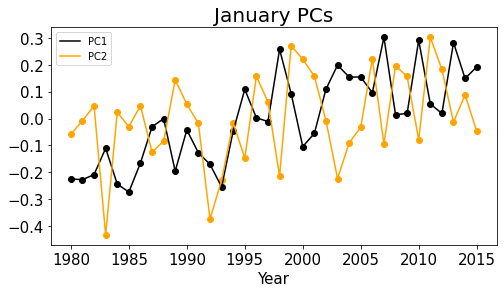

In [78]:
fig = plt.figure(figsize = (8,4))
plt.plot(time, pcs[:,0], 'k', label = 'PC1') #PC1
plt.scatter(time, pcs[:,0], color = 'k')
plt.plot(time, 0-pcs[:,1], 'orange', label = 'PC2') #PC2
plt.scatter(time, 0-pcs[:,1], color ='orange')
plt.title('January PCs', size =20)
plt.xlabel('Year', size =15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.legend()
#plt.savefig('January Air Only PCs.png')

# Figure 12

In [81]:
eigvals = np.load('January Air Only Eigenvalues.npy')
eigvals = eigvals.real
num_eval = np.arange(eigvals.shape[0])+1
cumulative_eval = np.cumsum(eigvals).real

Text(0.5, 1.0, 'January Air and Ocean Scree Plot')

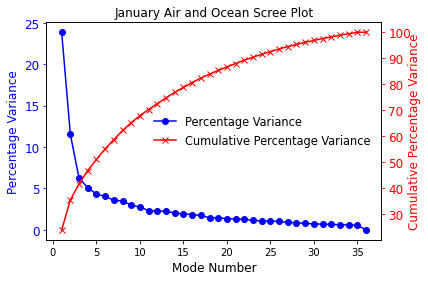

In [82]:
fig, ax = plt.subplots()

p1, = plt.plot(num_eval,(eigvals/cumulative_eval[-1])*100, 'b', marker = 'o',label = 'Percentage Variance')
plt.yticks(size = 12)
ax.set_ylabel("Percentage Variance", size = 12)
ax.yaxis.label.set_color('blue')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
p2, = plt.plot(num_eval,(cumulative_eval/cumulative_eval[-1])*100,'r', marker = 'x',label = 'Cumulative Percentage Variance')
plt.yticks(size = 12)
ax2.tick_params('y', colors='r')
ax2.set_ylabel("Cumulative Percentage Variance", size = 12)
ax2.yaxis.set_label_coords(1.08,0.5)
ax2.yaxis.label.set_color('red')

plt.legend(handles=[p1,p2],loc='center right', prop = {'size':11.4}, frameon=False)
plt.xticks(size =20)
ax.set_xlabel('Mode Number', size = 12)
plt.title('January Air Only Scree Plot', size = 12)
#plt.savefig('January Air Only Scree Plot.png')

# Figure 13

In [83]:
PhysicalEOFs = np.load('January Air Only Physical EOFs.npy')

Text(0.5, 0.98, 'Jan Air-Only EOF1 at Different Layers')

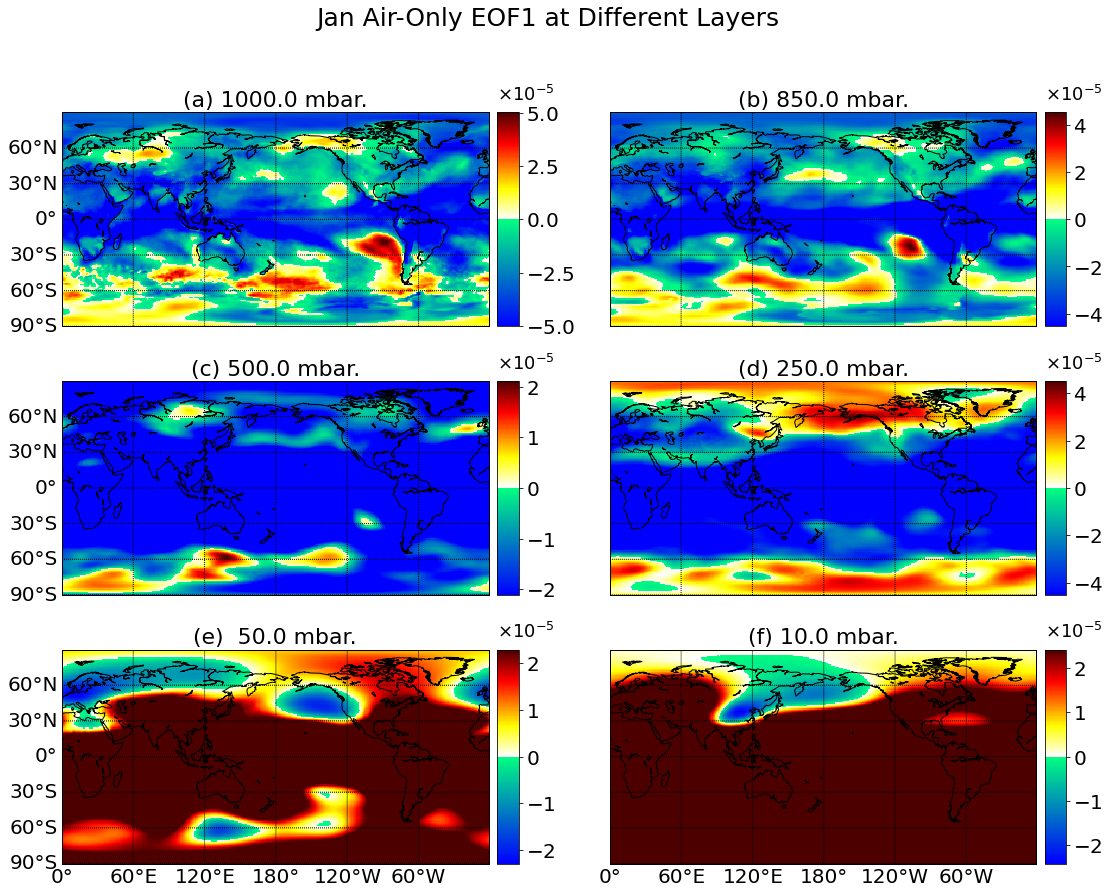

In [85]:
fig = plt.figure(figsize=(18,14))

#1000 mbar
ax1 = fig.add_subplot(3,2,1)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[0:181*360,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))

cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(a) "+ str(levels[0]) + ' mbar.', size = 22 )

#850 mbar
ax2 = fig.add_subplot(3,2,2)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*5:181*360*6,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12

cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(b) "+ str(levels[5]) + ' mbar.', size = 22 )

#500 mbar
ax3 = fig.add_subplot(3,2,3)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*12:181*360*13,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12

cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(c) "+ str(levels[12]) + ' mbar.', size = 22 )

#250 mbar
ax4 = fig.add_subplot(3,2,4)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*17:181*360*18,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')

cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(d) "+ str(levels[17]) + ' mbar.', size = 22 )
#50 mbar
ax5 = fig.add_subplot(3,2,5)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*22:181*360*23,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1], size = 20)
plt.title("(e)  "+ str(levels[22]) + ' mbar.', size = 22 )

#10mbar
ax6 = fig.add_subplot(3,2,6)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =0-np.reshape(PhysicalEOFs[181*360*25:181*360*26,0],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1], size = 20)
plt.title("(f) "+ str(levels[-3]) + ' mbar.', size = 22 )
plt.suptitle('Jan Air-Only EOF1 at Different Layers', size = 25)
#plt.savefig('Jan Air-Only EOF1 at Different Layers.png')

# Figure 14

In [86]:
air_phys = PhysicalEOFs[0:airsize,:]
air_phys = np.reshape(air_phys, (28,181,360,36))
cross_sec = np.nanmean(air_phys[:,60:100,:,0], axis = 1)

cross_sec1 = np.nanmean(air_phys[:,:,180:231,0], axis = 2)

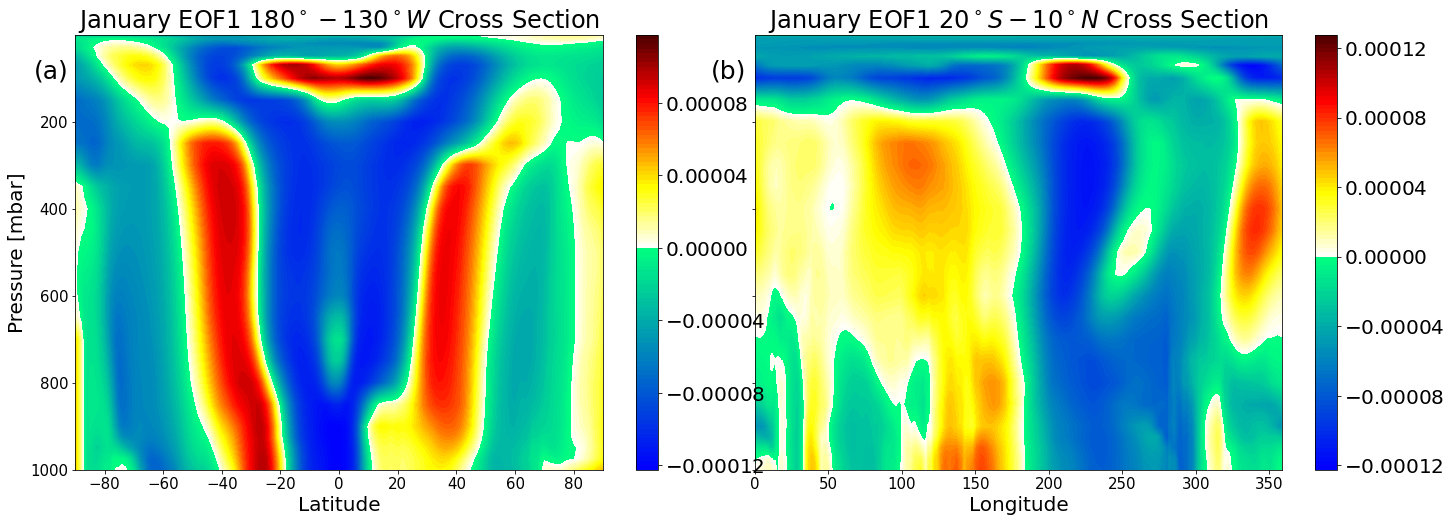

In [94]:
fig  = plt.figure(figsize = (24,8))
gs = fig.add_gridspec(1,2,wspace = 0.03)
axs = gs.subplots(sharey = True)
# HADLEY CELL CROSS SECTION
Z= 0-cross_sec1
norm = colors.TwoSlopeNorm(vcenter=0.0)
map1 = axs[0].contourf(yz, zy, Z,levels = 100,norm = norm, cmap = mymap )
axs[0].set_title(r'January EOF1 $180^\circ - 130^\circ W $ Cross Section', size = 24)
plt.text(-490, 100, '(a)', size = 25)
axs[0].invert_yaxis()

plt.sca(axs[0])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Pressure [mbar]', size = 20)
plt.xlabel('Latitude', size= 20)
cb1 = fig.colorbar(map1,ax=axs[0], format=ticker.ScalarFormatter(useMathText=True))
cb1.locator = ticker.MaxNLocator(nbins =7)
cb1.update_ticks()
#cb1.ax.set_title(r'$\times 10^{-5}$', size = 20)
cb1.ax.yaxis.get_offset_text().set_fontsize(18)
cb1.ax.yaxis.OFFSETTEXTPAD = 12
cb1.ax.yaxis.set_offset_position('left')
cb1.ax.tick_params(labelsize=20)

# ENSO CROSS SECTION
Z= 0-cross_sec
norm = colors.TwoSlopeNorm(vcenter=0.0)
map2 = axs[1].contourf(xz, zx, Z,levels = 100,norm = norm, cmap = mymap )
axs[1].set_title(r'January EOF1 $20^\circ S - 10^\circ N$ Cross Section', size = 24)
plt.sca(axs[1])
plt.text(-30,100, '(b)', size = 25, color = 'k')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Longitude', size= 20)
cb2 = fig.colorbar(map2,ax=axs[1], format =ticker.ScalarFormatter(useMathText=True))
cb2.locator = ticker.MaxNLocator(nbins =7)
#cb2.ax.set_title(r'$\times 10^{-5}$', size = 20)
cb2.update_ticks()
cb2.ax.yaxis.get_offset_text().set_fontsize(18)
cb2.ax.yaxis.OFFSETTEXTPAD = 12
cb2.ax.yaxis.set_offset_position('left')
cb2.ax.tick_params(labelsize=20)
#plt.savefig('Air-Only Vertical Cross Sections Mode 1')

# Figure 16

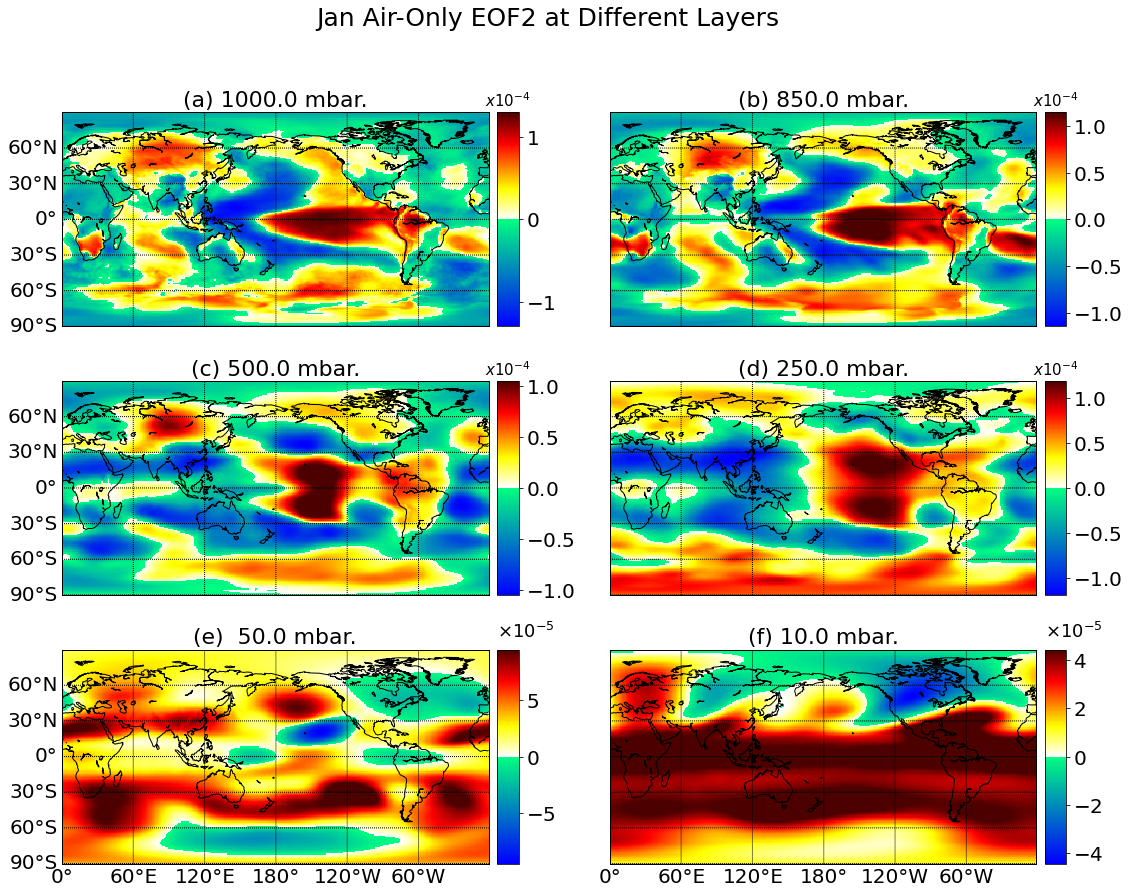

In [98]:
fig = plt.figure(figsize=(18,14))

#1000 mbar
ax1 = fig.add_subplot(3,2,1)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[0:181*360,1],(181,360))*10**4
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.set_title(r'$x10^{-4}$',size = 15)
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(a) "+ str(levels[0]) + ' mbar.', size = 22 )

#850 mbar
ax2 = fig.add_subplot(3,2,2)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*5:181*360*6,1],(181,360))*10**4
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.set_title(r'$x10^{-4}$',size = 15)
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(b) "+ str(levels[5]) + ' mbar.', size = 22 )

#500 mbar
ax3 = fig.add_subplot(3,2,3)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*12:181*360*13,1],(181,360))*10**4
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.set_title(r'$x10^{-4}$',size = 15)
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(c) "+ str(levels[12]) + ' mbar.', size = 22 )

#250 mbar
ax4 = fig.add_subplot(3,2,4)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*17:181*360*18,1],(181,360))*10**4
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.set_title(r'$x10^{-4}$',size = 15)
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,0], size = 20)
plt.title("(d) "+ str(levels[17]) + ' mbar.', size = 22 )
#50 mbar
ax5 = fig.add_subplot(3,2,5)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*22:181*360*23,1],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1], size = 20)
plt.title("(e)  "+ str(levels[22]) + ' mbar.', size = 22 )

#10mbar
ax6 = fig.add_subplot(3,2,6)
m=Basemap(projection='cyl',llcrnrlon=air_lons.min(), \
          urcrnrlon=air_lons.max(),llcrnrlat=air_lats.min(),urcrnrlat=air_lats.max(), \
          resolution='c')

Z =np.reshape(PhysicalEOFs[181*360*25:181*360*26,1],(181,360))
zmin = np.nanmin(Z)
zmax = np.nanmax(Z)
zlim = np.minimum(np.abs(zmin), zmax)
surface = np.clip(Z, -zlim, zlim)        
vmax = np.nanmax(surface)
vmin = np.nanmin(surface)
norm = colors.TwoSlopeNorm(vmin = vmin, vcenter=0.0, vmax = vmax)

m.pcolormesh(xxair,yyair,surface,norm = norm, shading='auto',cmap=mymap)
cb = m.colorbar(format=ticker.ScalarFormatter(useMathText=True))
cb.ax.yaxis.get_offset_text().set_fontsize(18)
cb.ax.yaxis.OFFSETTEXTPAD = 12
cb.ax.yaxis.set_offset_position('left')
cb.ax.tick_params(labelsize=20)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[0,0,0,0], size = 20)
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1], size = 20)
plt.title("(f) "+ str(levels[-3]) + ' mbar.', size = 22 )
plt.suptitle('Jan Air-Only EOF2 at Different Layers', size = 25)
#plt.savefig('Jan Air Only EOF2 at Different Layers.png')

# Figure 17

In [91]:
air_phys = PhysicalEOFs[0:airsize,:]
air_phys = np.reshape(air_phys, (28,181,360,36))
cross_sec = np.nanmean(air_phys[:,60:100,:,1], axis = 1)

cross_sec1 = np.nanmean(air_phys[:,:,180:231,1], axis = 2)

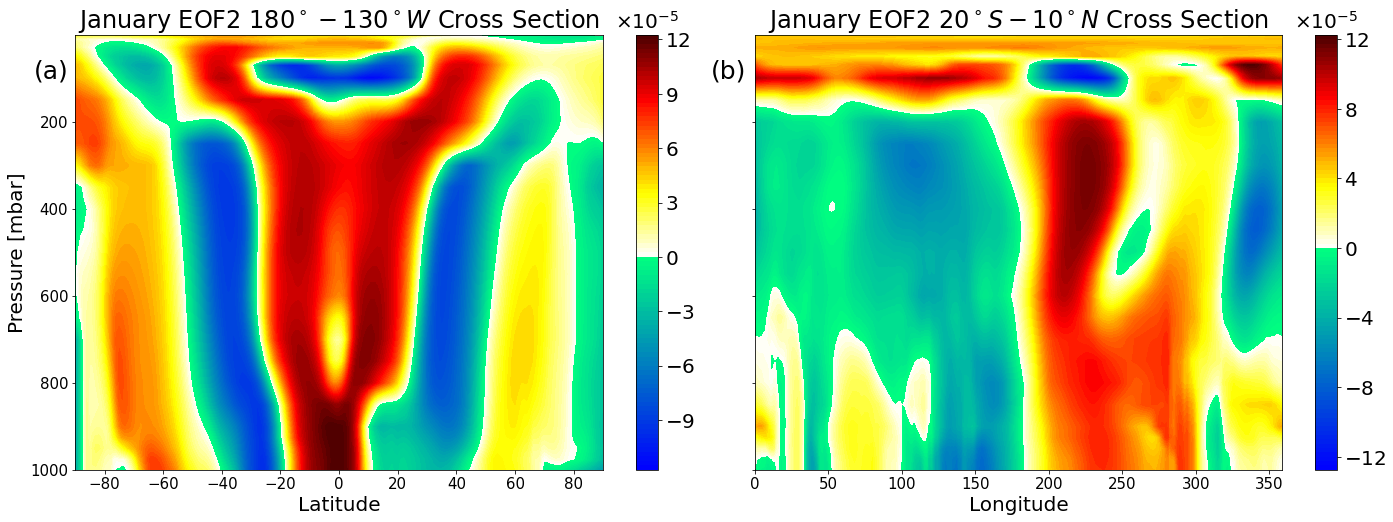

In [99]:
fig  = plt.figure(figsize = (24,8))
gs = fig.add_gridspec(1,2,wspace = 0.03)
axs = gs.subplots(sharey = True)

Z= cross_sec1*10**5
norm = colors.TwoSlopeNorm(vcenter=0.0)
map1 = axs[0].contourf(yz, zy, Z,levels = 100,norm = norm, cmap = mymap )
axs[0].set_title(r'January EOF2 $180^\circ - 130^\circ W $ Cross Section', size = 24)
plt.text(-490, 100, '(a)', size = 25)
axs[0].invert_yaxis()

plt.sca(axs[0])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Pressure [mbar]', size = 20)
plt.xlabel('Latitude', size= 20)
cb1 = fig.colorbar(map1,ax=axs[0], format=ticker.ScalarFormatter(useMathText=True))
cb1.locator = ticker.MaxNLocator(nbins =8)
cb1.update_ticks()
cb1.ax.set_title(r'$\times 10^{-5}$', size = 20)
cb1.ax.yaxis.get_offset_text().set_fontsize(18)
cb1.ax.yaxis.OFFSETTEXTPAD = 12
cb1.ax.yaxis.set_offset_position('left')
cb1.ax.tick_params(labelsize=20)
Z= cross_sec*10**5
norm = colors.TwoSlopeNorm(vcenter=0.0)
map2 = axs[1].contourf(xz, zx, Z,levels = 100,norm = norm, cmap = mymap )
axs[1].set_title(r'January EOF2 $20^\circ S - 10^\circ N$ Cross Section', size = 24)
plt.sca(axs[1])
plt.text(-30,100, '(b)', size = 25, color = 'k')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Longitude', size= 20)
cb2 = fig.colorbar(map2,ax=axs[1], format =ticker.ScalarFormatter(useMathText=True))
cb2.locator = ticker.MaxNLocator(nbins =8)
cb2.ax.set_title(r'$\times 10^{-5}$', size = 20)
cb2.update_ticks()
cb2.ax.yaxis.get_offset_text().set_fontsize(18)
cb2.ax.yaxis.OFFSETTEXTPAD = 12
cb2.ax.yaxis.set_offset_position('left')
cb2.ax.tick_params(labelsize=20)
#plt.savefig('Air-Only Vertical Cross Sections Mode 2')